<h1 align="center">Using temporal acoustic features to predict which songs will be liked among those recommended by Spotify</h1> 

![Spotify Discover Weekly](images/discover_weekly4.png)

## Introduction

Music unquestionably plays an important role in many of our lives. It comforts, moves, encourages, inspires as well as entertains. It's significance in our culture is undeniable and it is an engaging and significant part of life's experience. For an increasing number of people, their primary access to music is through one of the streaming music services that enables access to a virtually unlimited catalog of music. A great benefit of these services is the ability to discover new music. Most of these services provide music recommendations usually based on a user's listening habits. The most amazing and useful feature of these services is serendipity and the brilliant discovery of music for you, great music that you otherwise never would have come across which increases listener satisfaction.


## Spotify

Spotify, in particular, has had great success with its "Discovery Weekly" offering where each Monday they send each user a playlist containing 30 songs that Spotify believes reflects the user's musical taste and listening habits. Spotify's recommendations are influenced by many factors, but they are largely based on what Spotify calls the user's "taste profile". One's taste profile goes beyond just what one frequently listens to. It also considers the social and cultural knowledge about how specific artists and tracks are described online. Recommendations are also influenced by what other Spotify users with similar tastes are playing and adding to their playlists. Additionally, Spotify has detailed analyses of the characteristics of each track which also informs recommendations, and enables them to identify other songs with similar progressions or structures. In sum, Spotify does a great job of organizing and understanding music. This facilitates their recommendations, based not on the popularity of a song or artist but on the style and fundamental composition of the music. This organically and greatly expands their users' musical horizons.


When I first started using Discovery Weekly I added perhaps 3-4 songs from each weekly 30-song playlist to one of my created playlists. However, over time, ostensibly as my music tastes became more discernible, Spotify has gotten to know me quite well and never fails to surprise and delight with its recommendations. Most of the recommendations I now like very much. For every 30-song Discovery Weekly playlist there are about 5-10 songs that I really enjoy and one or two that I simply can't stop repeating. Then there are about 10 or so that I like well enough. Nevertheless, there are periodically a few songs that I completely reject and would absoultely never listen to again. Spotify does an outstanding job of figuring me out, but because music is so deeply subjective there are still some misses.
 


## Project Overview

It's simply magical how accurate Spotify's music recommedations are but I'm intrigued with the misses. Spotify obviously thinks the miss is a song that I would like and clearly someone else is liking it. Nevertheless I don't. And because music is so deeply personal it can be frustratingly difficult to describe why you like one song and not another. Fortunately, Spotify provides data on the acoustic features of each track based on audio signal analysis. These features, accessible through Spotify's web API (formerly Echo Nest), have been usefully applied in a number of music classification tasks. My goal is to explore if these extracted features can enable the identification of patterns in the songs that I am compelled to keep versus those that I reject from among the songs that Spotify recommends to me.  

The audio analysis provided by Spotify effectively describes all musical events within a given song - how fast it is, how loud it gets, what instruments it's composed of, and it's pitch and overall structure. The data contain a set of high-level descriptors (e.g., popularity, genre, danceability) in addition to two primary sets of audio features, Timbre and Pitch, described as being Mel Frequecy Cepstral Coefficients (MFCC)-like and Chroma-like, respectively. These returned feature vectors are aligned with a musical event (i.e., beat) within the track and so are of varying length and need to be transformed into a fixed-length representation in order to be useful in machine learning. Various transformation methods have been used with this feature set including calculating the average (Dieleman, et al., 2011; Hartmann et al., 2013) and covariance (Bertin-Mahieux, 2011; Prockup et al., 2015) of the vectors for genre classification. However, a recent study has revealed that aggregating the vectors using the statistics of temporal variations (e.g., mean, median, variance, min, max, value range, skewness, kurtosis) achieves an accuracy of up to 89% on music genre classification, outperforming previous methods of aggregation (Schindler and Rauber, 2012). 

Regarding studies classifying different genres, the presence of genre-typical instrumental sounds can undoubtedly help to identify a particular genre and discriminate between genres, but the question that motivates this project is can temporal acoustic features be used to discriminate within the same genre? In other words, can these features be used to predict from among a group of songs from the same genre which I will like and which I will reject? 


![Spotify Chill Music](images/spotify_chill.png)

### "Chill" Music!
This is a straightforward supervised machine learning task. I used myself as the ground truth. Over nearly a 2-year period, I segregated many of the songs that Spotify recommended to me into two separate "Liked" and "Rejected" playlists. For this project, I restricted the songs to a single genre of music  - "Chill" (characterized by a mid-tempo, smooth, rhythmic, electronic, beat-centric, mellow style). I chose this genre because I frequently listen to "Chill" music while coding and thus Spotify has offered many recommendations from within the genre. Additionally, the genre is often instrumental and I wanted to eliminate the influence of vocals and lyrics on the likeability of a song as their influence may be more difficult for a machine learning model to discern. I only chose songs that had little or no vocals. Any vocals in the included tracks were either a limited background refrain or primarily just sounds serving as an additional instrument. I've provided a sample "Chill" playlist below.

In [1]:
# Sample 'Chill' playlist
from IPython.display import IFrame
IFrame(src="https://embed.spotify.com/?uri=spotify:user:hisbiz:playlist:7knS2Gtp62Pjfp2bHEzBJl", width=320, height=400)

Naturally, whether a song was liked or rejected was subjective and self-curated, but it was important that I made the two playlists extremes. The qualification for being added to the "Liked" playlist was that I had to love the song almost immediately, on first listen. Songs in the "Rejected" playlist were songs that I absolutely would never want to play again. These categories were absolute. If there was any doubt whether I loved a song or completely disliked a song it was not added to either playlist. Only about 20-25% of all Spotify recommendations were added to one of the playlists. The dataset for this project consisted of 335 samples in the "Liked" class and 335 samples in the "Rejected" class.
                          



## The Data

Utilizing Spotify's web API I retrieved the audio signal analysis for each track in the two "Liked" and "Rejected" playlists for a total of 670 samples (335 from each playlist). The two primary sets of acoustic features provided are Timbre (MFCC-like) and Pitch (Chroma-like). Both are derived from a spectrogram but they capture different aspects of the music. Timbre reflects the surface quality of a sound, or how a sound "sounds" - what instruments are present, and how loud or noisy the arrangement is. It's the spectro-temporal quality of sound. It describes the relative position of the harmonics or the amount of distortion in the signal over a short period of time and enables one to differentiate between two sounds having the same loudness and pitch. For example, the sounds of a keyboard and violin may have identical pitch and loudness but they still have a characteristic sound and are readily distinguished. Pitch, on the other hand, gives an indication of the notes played in a song, the sonic progressions. The returned data also includes a number of additional descriptors and high-level features (e.g., Artist Information, Album Information, Popularity, Energy, Danceability) but I will limit my focus to the acoustic features that are of primary interest to this project.


### Segments

Spotify's algorithm discovers the presence of musical events through an onset detector. Each musical event or beat is called a Segment. The time-interval of each Segment on average corresponds to less than a half second of audio, and the average song has about 1000 of these events or Segments. These Segment sequences represent a time series of the feature data.

The API returns Timbre and Pitch along with loudness and duration information for each Segment. The Timbre data is returned as a 12-dimensional vector where each element matches a spectral chracteristic (the first dimension is loudness, the second indicates a strong attack, the third reflects the flatness of the sound, etc.). Timbre is significant as it describes the relationship between the frequencies without knowing about the actual pitches. The Timbre vector has unbounded values centered around 0. 


<h3 align="center">**The first 200 Timbre vectors of a track**</h3> 

![Timbre Plot](images/tibre_plot.png)


Pitch is also returned as a 12-dimensional vector representing the relative dominance of the 12 pitch classes (C, C#, through to B) at each time sample within the track, with values ranging from 0 to 1 (normalized by dividing by the maximum value or strongest dimension at each time sample). Additionally, each Segment yields a Loudness Max value (representing the peak loudness within the segment), a Loudness Max Time (the offset point within the segment of max loudness), and the Duration.

Since these Segment sequences are beat-aligned they are of variable length and need to be properly aggregated to a fixed-length in order to be used in machine learning. So, for example, for a track that has 600 beats there would be 600 12-dimensional Timbre vectors that would be statistically aggregated into one representative 12-dimensional feature vector. Schindler and Rauber (2012) demonstrated the effectiveness of calculating the statistical moments (mean, median, variance, min, max, value range, skewness, kurtosis) from each dimension of sequentially retrieved feature data to capture temporal variations of the underlying feature space. These transformations effectively describe the acoustic (rhythmical, instrumental, etc.) variations of the audio spectrum over time. With this in mind, for each track, I aggregated the sequences of 12-dimensional Timbre and Pitch vectors by calculating the statistical measures mean, median, variance, skewness, kurtosis, min, max and range for each. I thus had eight 12-dimensional Timbre vectors and eight 12-dimensional Pitch vectors, equalling 192 features. Added to these, I calculated the eight statistical moments for Segment Loudness Max, Segment Loudness Max Time, and Segment Duration for an additional 24 features. 


### Sections

Collectively, the 116 derived features from the Segments have been shown to be useful for music genre classification (Schindler and Rauber, 2012). However, I am interested in a few additional features that I consider potentially helpful for this present task. Spotify's detector also identifies what it calls Sections which are longer than Segments. Sections identify larger blocks within a track which represent significant changes in rhythm or timbre (e.g., chorus, verse, guitar solo, etc.). Each Section, in addition to duration, contains its own descriptions of tempo, loudness, and key which may further aid the effort to discrimate between songs of the same genre. Sections also are of variable length so the Section Tempo, Section Loudness, and Section Duration sequences are all aggregated using the same eight statistical moments as the Segments. This provided an additional 24 features. Finally, the Section Key sequence indicates the estimated key (pitch class) for a given Section.

index:          [0, 1,  2, 3,  4, 5, 6, 7, 8,  9, 10, 11]

pitch class:    [C  C#  D  D#  E  F  F# G  G#  A  A#   B]

So, a "0" value for a given Section would indicate that the estimated key is "C"; a value of "10" would indicate that A# was the key for that Section. Typically there are between 5-10 Sections per song. I normalized the returned Section Key sequence into a 12-dimensional vector (refelecting the 12 pitch classes) indicating the percentage of the Sections that is composed of a specific key. For example, if a track is determined to have 7 Sections and the returned vector is [10, 6, 10, 1, 10, 6, 3], I used Numpy's bincount function to convert it into a 12-dimensional vector ([0, 1, 0, 1, 0, 0, 2, 0 ,0 ,0 , 3, 0]) reflecting the counts of the various pitch classes by index position (there are 3 Sections in the key A# which is indicated by the 3 in the 10th index position). I then normalized that 12-dimensional vector to ultimately end up with 12 features reflecting the percentage of a song's Sections that is in a specific key: [0, .1428, 0, .1428, 0, 0, .2857, 0, 0, 0, .4285, 0].

In total there are 252 features from the calculated statistical moments capturing the temporal domain of each track. This project will use various subsets of these features to help identify the most effective machine learning model for predicting the target vector ("Liked").



---
## The Project

To begin, I first wrote a script ("spotimy.py") to retrieve the audio analysis of the various tracks from my "Liked" and "Rejected" playlists using Spotify's web API. The script applied the various statistical aggregation methods and created all previously described features. The data was then captured in a csv file ("spotify_liked_rejected.csv"). I then read the csv file into a Pandas dataframe and dropped the various metadata and other features that weren't a part of this analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

# read in the Spotify data
master_dataframe = pd.read_csv("spotify_liked_rejected.csv")

# drop unused metadata from the dataframe
cols1 = ["Song", "ID", "Popularity", "Duration(ms)", "Duration", "Artist", "Artist ID", "Artist Popularity", "Artist Genres"]
cols2 = ["Album", "Album ID", "Album Popularity", "Loudness", "Time Signature", "Tempo", "Mode", "Danceability", "Energy", "Valence", "Key", "#Segments", "#Sections", "Liked"]
df = master_dataframe.drop(cols1+cols2, axis=1) 

# Target vector
y = master_dataframe["Liked"].values


### Feature Subsets
I next created different feature subsets in order to evaluate which features contribute most to prediction accuracy. 

**X_Pitch**: Only the pitch features (96 features)

**X_Timbre**: Only the timbre features (96 features)

**X_Pitch_Timbre**: The pitch and timbre features, including Segment loudness and duration features (216 features)

**X_Pitch_Sections**: The pitch as well as the Section loudness, tempo, key and duration features (132 features)

**X_Timbre_Sections**: The timbre as well as the Section loudness, tempo, key and duration features (132 features)

**X_All**: All features (252 features)


### Model Evaluation
I split the data into train and test sets and standardized their features. I then chose a few classification algorithms to try with the various feature subsets (Logistic Regression, Support Vector Machine, Decision Tree, K-Nearest Neighbors, and Naive Bayes). The training set was used to train each model using nested 10x2 cross-validation (a grid search to find the best parameters for an algorithm followed by a 10-fold stratified cross validation using the best parameters). I produced a table and a boxplot to compare the mean validation scores for each algorithm. 


 10-Fold Cross Validation Means Across Feature Subsets


,LR,SVM,TREE,KNN,NB,MEAN
Pitch,0.698948,0.726981,0.573610,0.656260,0.571026,0.645365
Timbre,0.616590,0.703941,0.623830,0.628762,0.660922,0.646809
Pitch_Timbre,0.714127,0.730922,0.631211,0.641033,0.605398,0.664538
P_Sections,0.724813,0.739616,0.623150,0.649734,0.577502,0.662963
T_Sections,0.635841,0.695016,0.640081,0.618214,0.663323,0.650495
All,0.705932,0.722500,0.635783,0.675449,0.607707,0.669474
Mean,0.682708,0.719830,0.621278,0.644909,0.614313,0.656607


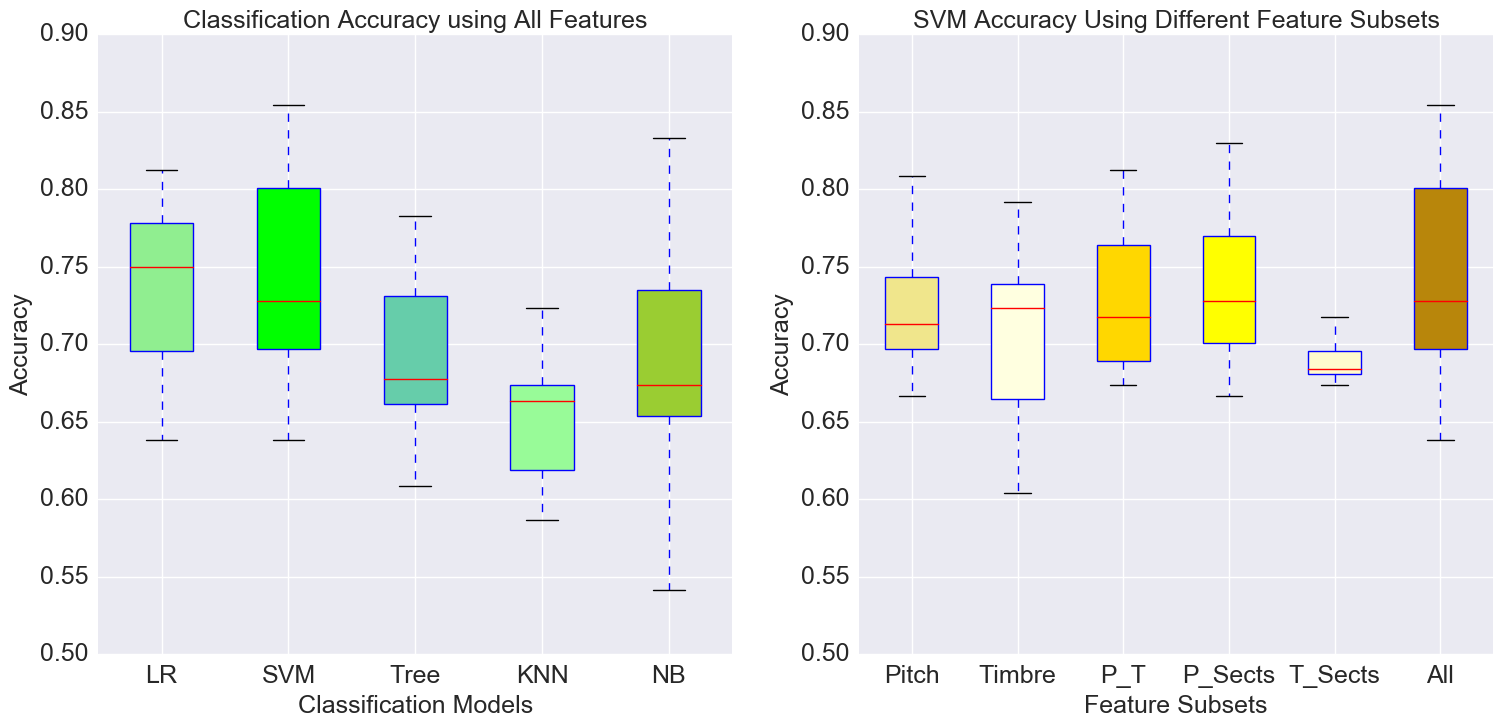

In [27]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV

# different feature subsets
X_Pitch = df.iloc[:, 8:104].values
X_Timbre = df.iloc[:, 104:200].values
X_Pitch_Timbre = df.iloc[:, :216].values
X_Pitch_Sections = np.hstack((df.iloc[:, 8:104].values, df.iloc[:, 216:252].values))
X_Timbre_Sections = np.hstack((df.iloc[:, 104:200].values, df.iloc[:, 216:252].values))
X_All = df.values

# split dataset into test/train  using All features
X_train, X_test, y_train, y_test = train_test_split(X_All, y, random_state=1, test_size=0.3)
# standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)  

# CV using ALL features with different models
param_range = [0.0001, 0.001, .005, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
classifiers = [{"clf":LogisticRegression(random_state=0), "param_grid":[{'C': param_range}]}, 
               {"clf":SVC(random_state=0), "param_grid":[{'C': param_range, 'gamma': param_range, 'kernel': ['rbf']}]}, 
               {"clf":DecisionTreeClassifier(random_state=0), "param_grid":[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}]},
               {"clf":KNeighborsClassifier(), "param_grid":[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}]}]

# 10x2 Nested Cross Validation  (algorithm comparison using the full feature set)
model_scores = []
for clf in classifiers:
    # Inner Cross Validation, searches for the best parameters
    gs = GridSearchCV(estimator=clf["clf"], param_grid=clf["param_grid"], scoring='accuracy', cv=2, n_jobs=-1)
    # Outer Cross Validation, evaluates the model
    model_scores.append(cross_val_score(gs, X_train_std, y_train, scoring='accuracy', cv=10))
nb = GaussianNB()
model_scores.append(cross_val_score(nb, X_train_std, y_train, scoring='accuracy', cv=10))


# Cross Validation using SVM with different feature subsets
svm = SVC(random_state=0)
subsets = [X_Pitch, X_Timbre, X_Pitch_Timbre, X_Pitch_Sections, X_Timbre_Sections, X_All]
sub_scores = []
def subset_scores(X):   
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
    stdsc = StandardScaler()
    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    gs = GridSearchCV(estimator=svm, param_grid=[{'C': param_range, 'gamma': param_range, 'kernel': ['rbf']}], 
                      scoring='accuracy', cv=2, n_jobs=-1)
    sub_scores.append(cross_val_score(gs, X_train_std, y_train, scoring='accuracy', cv=10))
    
for X in subsets:
    subset_scores(X)

# BOXPLOT comparing models and comparing SVM using different feature subsets
from drill_plots import set_tick_labels 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
# rectangular box plot
bplot_models = axes[0].boxplot(model_scores, vert=True, patch_artist=True)
bplot_subsets = axes[1].boxplot(sub_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lime", "mediumaquamarine", "palegreen", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
# fill with colors - Subsets
colors_o = ["khaki", "lightyellow", "gold", "yellow", "lemonchiffon", "darkgoldenrod"]
for patch, color in zip(bplot_subsets['boxes'], colors_o):
    patch.set_facecolor(color)
        
# adding axes labels
axes[0].yaxis.grid(True)
axes[0].set_xticks([y+1 for y in range(len(model_scores))])
axes[0].set_xlabel('Classification Models', fontsize=18)
axes[0].set_ylabel('Accuracy', fontsize=18)
axes[0].set_ylim((.5, .9))
axes[0].set_title('Classification Accuracy using All Features', fontsize = 18)

axes[1].yaxis.grid(True)
axes[1].set_xticks([y+1 for y in range(len(sub_scores))])
axes[1].set_xlabel('Feature Subsets', fontsize=18)
axes[1].set_ylabel('Accuracy', fontsize=18)
axes[1].set_ylim((.5,.9))
axes[1].set_title('SVM Accuracy Using Different Feature Subsets', fontsize = 18)

set_tick_labels(axes[0])
set_tick_labels(axes[1])

# add x-tick labels
plt.setp(axes[0], xticks=[y+1 for y in range(len(model_scores))],xticklabels=['LR', 'SVM', 'Tree', 'KNN', 'NB'])
plt.setp(axes[1], xticks=[y+1 for y in range(len(sub_scores))],xticklabels=['Pitch', 'Timbre', 'P_T', 'P_Sects',
                                                                            'T_Sects', 'All'])

print("\n 10-Fold Cross Validation Means Across Feature Subsets")
# Cross Validation Means Across Feature Subsets
classifier_subsets = np.array([
[0.69894773, 0.72698119, 0.57361047, 0.65625963, 0.57102606, 0.64536502],
[0.61658958, 0.70394118, 0.62383017, 0.62876195, 0.6609216, 0.6468089],
[0.71412658, 0.73092237, 0.63121146, 0.64103261, 0.60539817, 0.66453824],
[0.72481306, 0.73961609, 0.62314986, 0.64973404, 0.57750154, 0.66296292],
[0.63584066, 0.69501619, 0.64008056, 0.61821423, 0.66332293, 0.65049491],
[0.70593201, 0.72250038, 0.63578284, 0.67544904, 0.60770698, 0.66947425],
[0.68270827, 0.71982957, 0.62127756, 0.64490858, 0.61431288, 0.65660737200000008]])


combinations_df = pd.DataFrame(classifier_subsets, columns=["LR", "SVM", "TREE", "KNN", "NB", "MEAN"], 
                               index=["Pitch", "Timbre", "Pitch_Timbre", "P_Sections", "T_Sections", "All", "Mean" ])
combinations_df



The above table displays the mean performance of each algorithm across the different feature subsets. The Support Vector Machine (SVM) performed best in all instances. The boxplot on the left compares the accuracy of each classification algorithm trained on the full feature set using 10-fold cross validation. Although each of the models appears to be somewhat effective since they all exceed the baseline accuracy of 50% that would be obtained if I predicted either "Liked" or "Rejected" for all samples, visually, it is clear that the SVM provides the best predictive accuracy.

The boxplot on the right displays the performance of the SVM across the different feature subsets. Given its mean accuracy (73.9%) and smaller number of features (132), the best results seem to be obtained using the Pitch_Sections subset which comprises the 96 Pitch features in addition to the 36 Sections features (Duration, Loudness, Tempo, and Key).


### Data Exploration
Visualizing the distribution of the Sections features further suggests that including this subset may be helpful in learning to discriminate between the Liked and Rejected classes. Below is a histogram and density plot visualizing the Median Tempo and Median LoudnessMax. For Tempo, the Rejected samples are largely concentrated within 100-150 BPM whereas the Liked samples are more uniform throughout the Tempo range. For Loudnessmax, the rejected samples are clearly skewed to the right while the Liked samples have zero skewness.

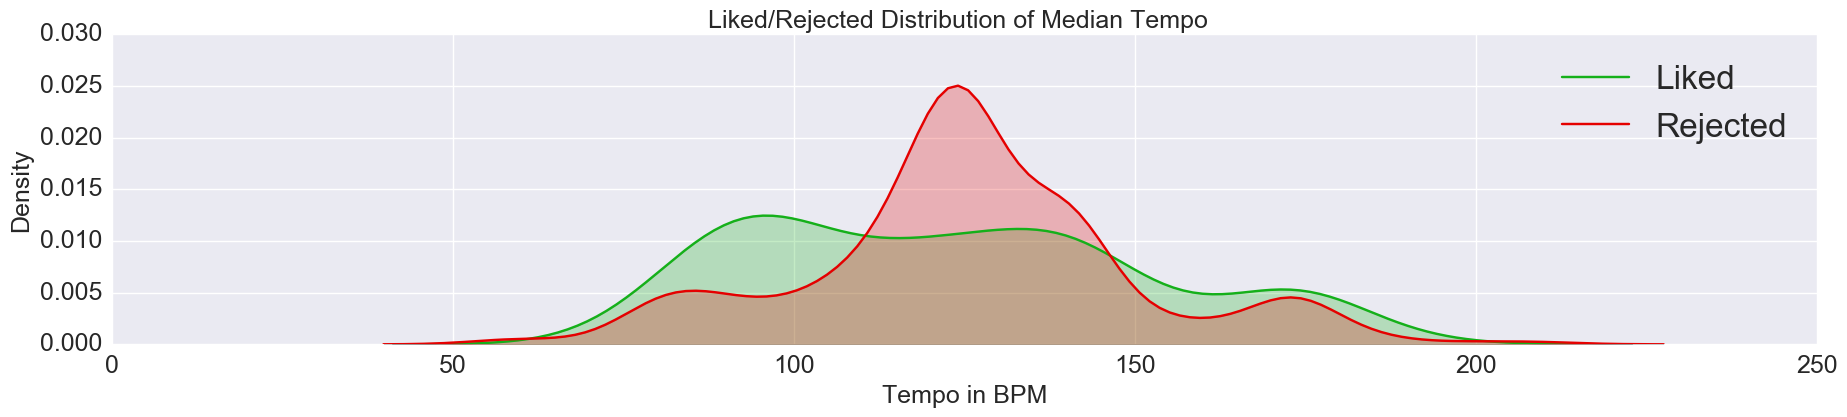

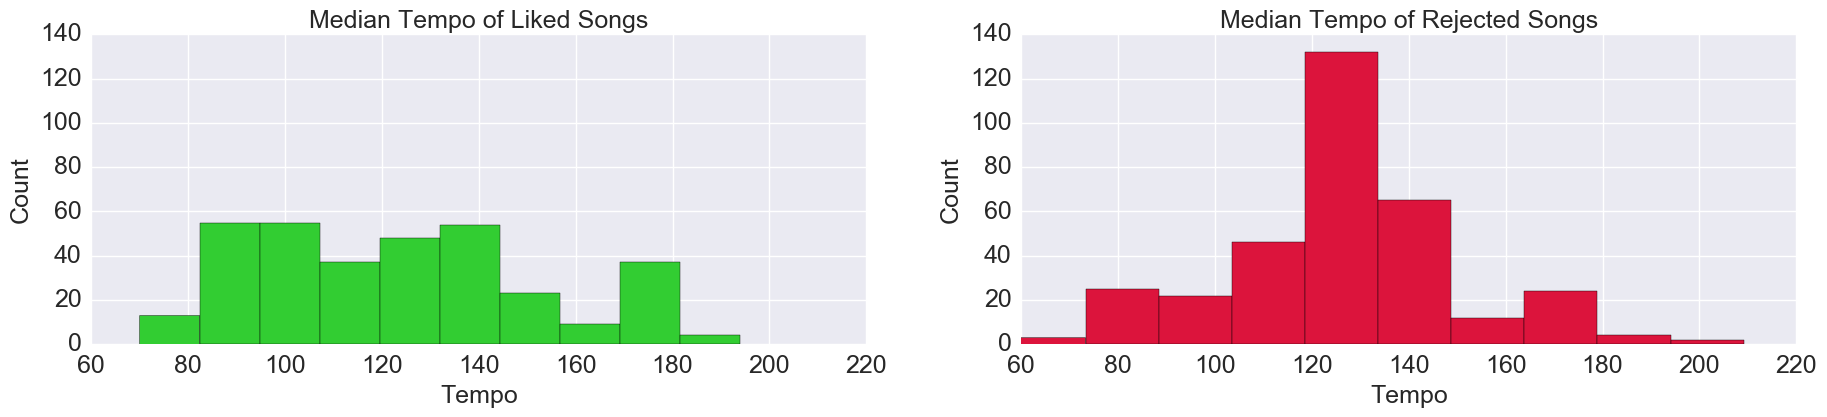

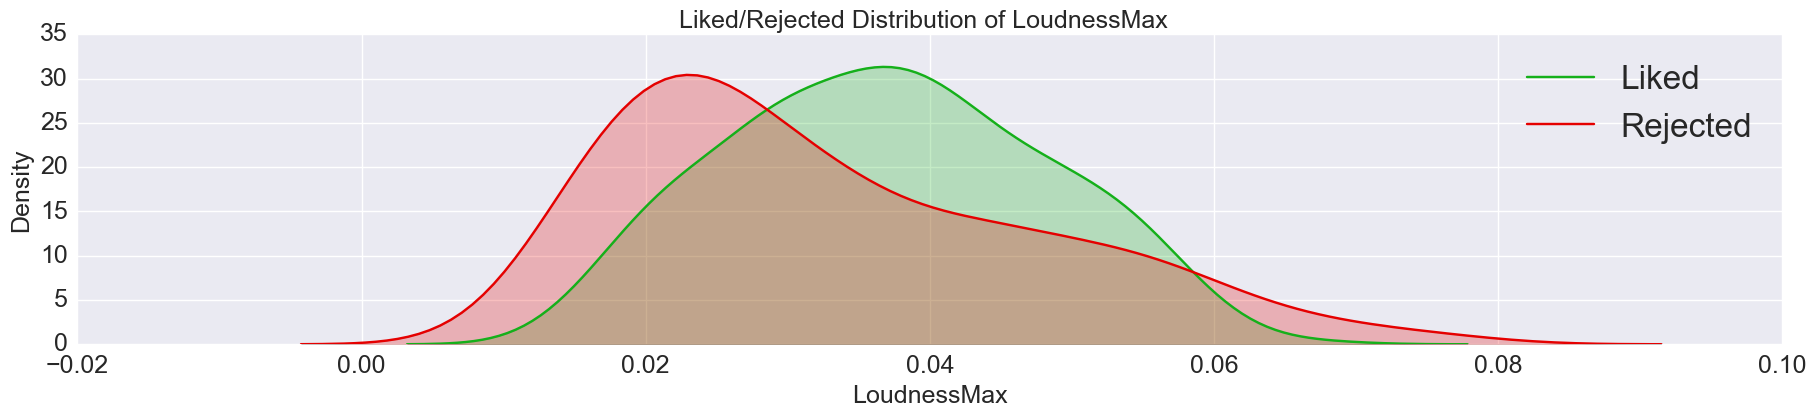

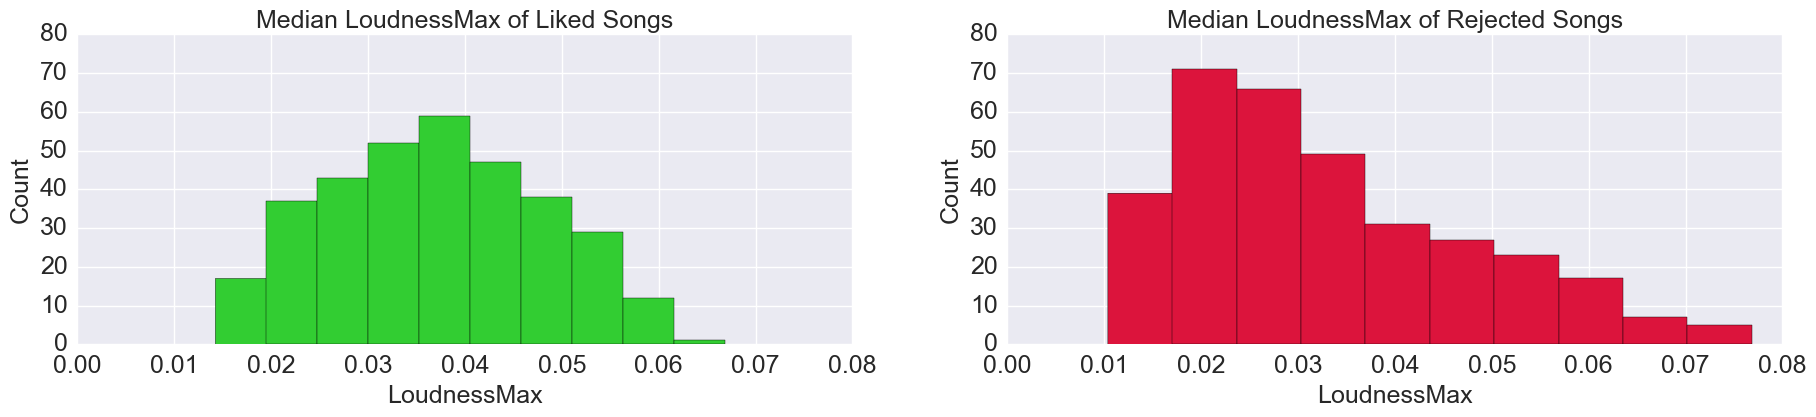

In [4]:
# Sections Median Tempo histogram and density plot
liked_tempo = master_dataframe.loc[:334, "Sect Tmpo Med"]
rejected_tempo = master_dataframe.loc[335:, "Sect Tmpo Med"]

fig, ax = plt.subplots(figsize=(22,4))
ax = sns.kdeplot(liked_tempo, shade=True, color=sns.xkcd_rgb["green"], label="Liked")
ax = sns.kdeplot(rejected_tempo, shade=True, color=sns.xkcd_rgb["red"], label="Rejected")

ax.set_title('Liked/Rejected Distribution of Median Tempo  ', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('Tempo in BPM', fontsize = 18)
plt.legend(fontsize=24)
set_tick_labels(ax)

fig, ax = plt.subplots(1, 2, figsize=(22,4))
ax[0].hist(liked_tempo, color='limegreen')
ax[0].set_title('Median Tempo of Liked Songs', fontsize = 18)
ax[0].set_ylabel('Count', fontsize = 18)
ax[0].set_xlabel('Tempo', fontsize = 18)
ax[0].set_ylim((0,140))
ax[0].set_xlim((60,220))
set_tick_labels(ax[0])

ax[1].hist(rejected_tempo, color='crimson')
ax[1].set_title('Median Tempo of Rejected Songs', fontsize = 18)
ax[1].set_ylabel('Count', fontsize = 18)
ax[1].set_xlabel('Tempo', fontsize = 18)
ax[1].set_ylim((0,140))
ax[1].set_xlim((60,220))
set_tick_labels(ax[1])

# Sections Median LoudnessMax histogram and density plot
liked_loudmax = master_dataframe.loc[:334, "LoudMax Med"]
rejected_loudmax = master_dataframe.loc[335:, "LoudMax Med"]

fig, ax = plt.subplots(figsize=(22,4))
ax = sns.kdeplot(liked_loudmax, shade=True, color=sns.xkcd_rgb["green"], label="Liked")
ax = sns.kdeplot(rejected_loudmax, shade=True, color=sns.xkcd_rgb["red"], label="Rejected")

ax.set_title('Liked/Rejected Distribution of LoudnessMax  ', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('LoudnessMax', fontsize = 18)
plt.legend(fontsize=24)
set_tick_labels(ax)

fig, ax = plt.subplots(1, 2, figsize=(22,4))
ax[0].hist(liked_loudmax, color='limegreen')
ax[0].set_title('Median LoudnessMax of Liked Songs', fontsize = 18)
ax[0].set_ylabel('Count', fontsize = 18)
ax[0].set_xlabel('LoudnessMax', fontsize = 18)
ax[0].set_ylim((0,80))
ax[0].set_xlim((0,.08))
set_tick_labels(ax[0])

ax[1].hist(rejected_loudmax, color='crimson')
ax[1].set_title('Median LoudnessMax of Rejected Songs', fontsize = 18)
ax[1].set_ylabel('Count', fontsize = 18)
ax[1].set_xlabel('LoudnessMax', fontsize = 18)
ax[1].set_ylim((0,80))
ax[1].set_xlim((0, .08))
set_tick_labels(ax[1])
print()

I also explored the Sections Key feature in the barplots below. I engineered the feature to describe the percentage of a song's Sections that is in a given key. Interestingly, even though their means are quite similar, there is a clear difference in the varability of a key's percentage in Liked versus Rejected songs as evidenced by visualizing the mean (left) and the variance (right). 

(It's important to note that the **Key** feature represents the discrete overall key (a collection of pitches used together) for a given Section of a song, whereas the **Pitch** represents the relative dominance of ***each*** of the 12 pitch classes for a given Segment.)

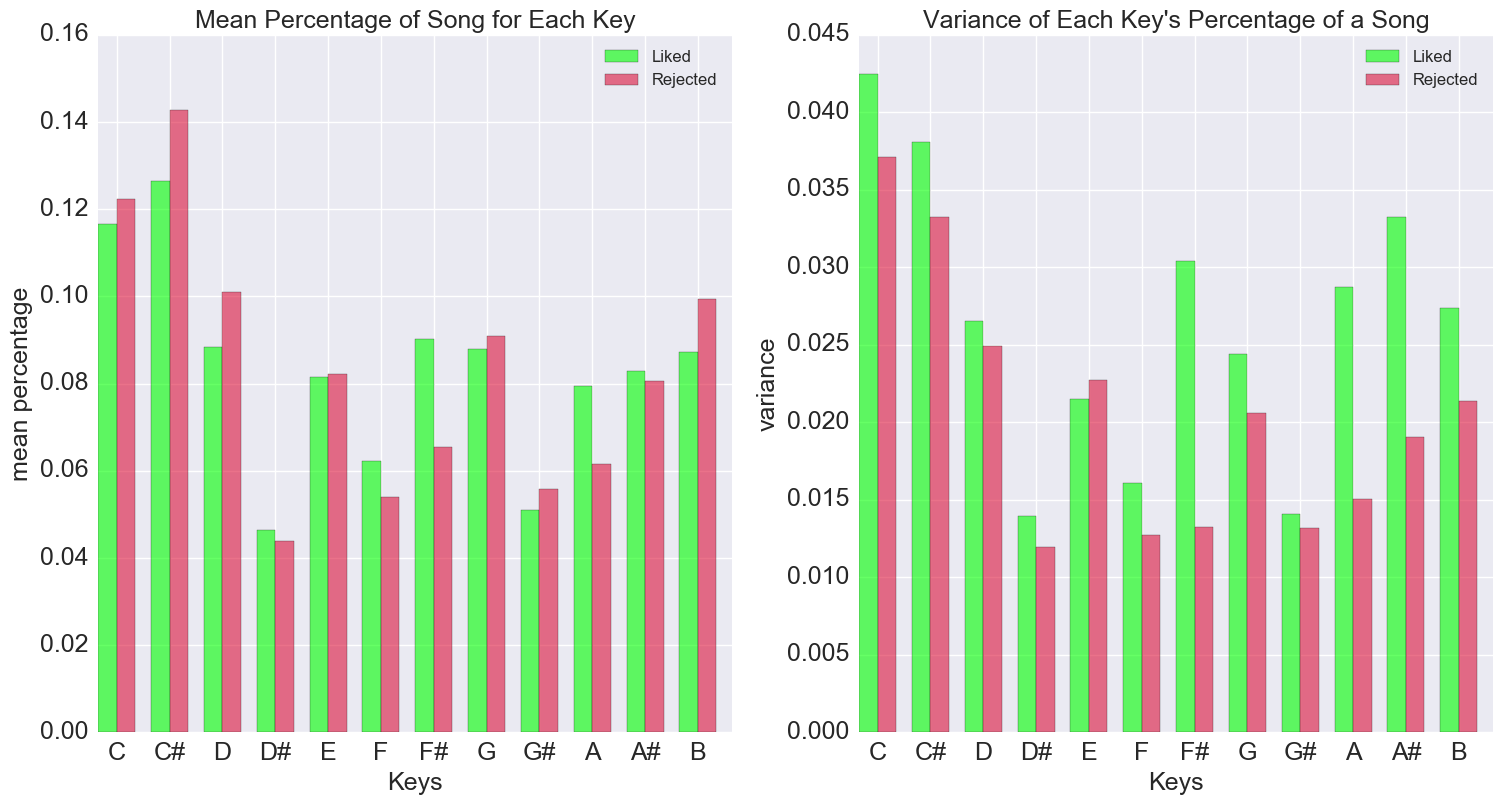

In [5]:
liked_keys = master_dataframe.loc[:334, ["C", "C#/Df", "D", "D#/Ef", "E", "F", 
                                         "F#/Gf", "G", "G#/Af", "A", "A#/Bf", "B"]].values
rejected_keys = master_dataframe.loc[335:, ["C", "C#/Df", "D", "D#/Ef", "E", "F",
                                            "F#/Gf", "G", "G#/Af", "A", "A#/Bf", "B"]].values
liked_means = np.mean(liked_keys, axis=0)
rejected_means = np.mean(rejected_keys, axis=0)
liked_std = np.var(liked_keys, axis=0)
rejected_std = np.var(rejected_keys, axis=0)

Keys = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
n_groups = len(Keys)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.6

rects1 = ax[0].bar(index, liked_means, bar_width,
                 alpha=opacity,
                 color='lime',
                 label='Liked')

rects2 = ax[0].bar(index + bar_width, rejected_means, bar_width,
                 alpha=opacity,
                 color='crimson',
                 label='Rejected')

ax[0].set_xlabel('Keys', fontsize=18)
ax[0].set_ylabel("mean percentage", fontsize=18)
ax[0].set_title('Mean Percentage of Song for Each Key', fontsize=18)
set_tick_labels(ax[0])
plt.setp(ax[0], xticks=[i+bar_width for i in index],xticklabels=Keys)
ax[0].legend(fontsize=12)

rects3 = ax[1].bar(index, liked_std, bar_width,
                 alpha=opacity,
                 color='lime',
                 label='Liked')

rects4 = ax[1].bar(index + bar_width, rejected_std, bar_width,
                 alpha=opacity,
                 color='crimson',
                 label='Rejected')

ax[1].set_xlabel('Keys', fontsize=18)
ax[1].set_ylabel("variance", fontsize=18)
ax[1].set_title('Variance of Each Key\'s Percentage of a Song', fontsize=18)
set_tick_labels(ax[1])
plt.setp(ax[1], xticks=[i+bar_width for i in index],xticklabels=Keys)
ax[1].legend(fontsize=12)



### Feature Extraction 
It can be important to reduce the feature space of models to ease their interpretation and avoid overfitting so I next performed feature extraction on the Pitch_Sections subset to evaluate a reduction in the number of features. I performed Principal Component Analysis and extracted the components that account for 99% of the variability. This reduced the features set from 132 down to 75.

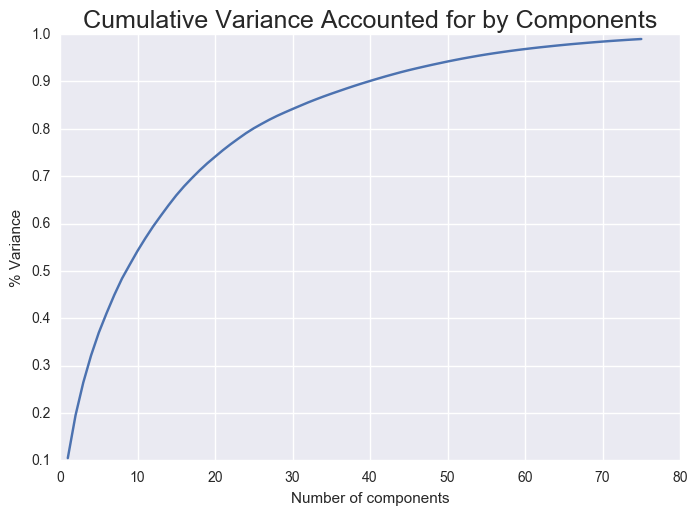

In [6]:
from sklearn.decomposition import PCA

# split dataset into test/train  using All features
X_train, X_test, y_train, y_test = train_test_split(X_Pitch_Sections, y, random_state=1, test_size=0.3)
# standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

pca = PCA()
pca.fit(X_train_std)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

def num_features_cumul_variance(cumul_variance, percent_cutoff):  
    cumul = [c for c in cumul_variance if c < percent_cutoff]
    num_features = len(cumul)
    return num_features

num_features = num_features_cumul_variance(cumulative_variance, .99)

pca = PCA(num_features)
X_train_pca = pca.fit_transform(X_train_std)

fig, ax = plt.subplots()
ax.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of components')
ax.set_ylabel('% Variance')
ax.set_title('Cumulative Variance Accounted for by Components', fontsize = 18)

Above is the plot of the number of components (75) that cumulatively account for 99% of the variance. Below I applied SVM with the reduced features using 10-fold cross validation and achieved virtually the same mean score (73.9%) as using the full 132 features.

In [7]:
svm = SVC(C=1, kernel='rbf', gamma=.005, random_state=1)
print(X_train_std.shape)
print(X_train_pca.shape)
print("CV mean score: {}".format(cross_val_score(svm, X_train_pca, y_train, scoring='accuracy', cv=10).mean()))

(469, 132)
(469, 75)
CV mean score: 0.7394330095590502


### Feature Selection
I also explored feature selection as another means to reduce the feature set. I fit a Random Forest Classifier to identify feature importance based on the usefulness of individual predictors. I again used the Pitch_Sections feature subset choosing a threshold of at least 1% importance. 26 features were selected. Using SVM with the transformed dataset I again achieved virtually the same mean score (73.7%) as with PCA or the full 132 features.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# split dataset into test/train  using All features
X_train, X_test, y_train, y_test = train_test_split(X_Pitch_Sections, y, random_state=1, test_size=0.3)
# standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)  

rf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
sfm = SelectFromModel(rf, threshold=.01)

# transform data to just the selected features
X_train_selected = sfm.fit_transform(X_train_std, y_train)

print("X_train_selected shape: ", X_train_selected.shape)
print("CV scores: {}".format(cross_val_score(svm, X_train_selected, y_train, scoring='accuracy', cv=10).mean()))

X_train_selected shape:  (469, 26)
CV scores: 0.7378469010175763


In [9]:
# Selected most important features
most_important_features = sfm.get_support(indices=True)
pitch_sections_features = np.hstack((df.columns[8:104], df.columns[216:252]))
print("26 Most Important Features: \n {}".format(list(pitch_sections_features[most_important_features])))

26 Most Important Features: 
 ['P0_Mn', 'P1_Mn', 'P0_Vr', 'P1_Vr', 'P10_Vr', 'P1_Med', 'P2_Med', 'P3_Med', 'P4_Med', 'P0_Min', 'P1_Min', 'P4_Min', 'P5_Min', 'P0_Rng', 'P1_Rng', 'P1_Skw', 'P0_Krt', 'Sect Dur Med', 'Sect Tmpo Mean', 'Sect Tmpo Med', 'Sect Tmpo Min', 'Sect Tmpo Max', 'Sect Tmpo Skew', 'Sect Loud Var', 'Sect Loud Max', 'Sect Loud Rng']


The most important features from the Pitch_Sections subset are identified to be primarily from Pitch classes 0 and 1 in addition to Section Tempo and Section Loudness. Interestingly, the Sections features compose 27% of the Pitch_Sections subset yet the 26 selected most important features consisted of 9 (35%) features from the Sections. This further highlights the potential value of the Sections features in this project.

### Additional Features: Popularity and Sub-Genres
73 percent is much better than chance but I would like to achieve a higher accuracy. In aiding this, I want to go back and look at a couple of the metadata features that were dropped from the dataset. The first is popularity. The popularity of a track on Spotify is primarily based on the total number of plays the track has had and how recent those plays are. Popularity is always a value between 0 and 100, with 100 being the most popular.

In [10]:
liked_mean_popularity = master_dataframe.loc[master_dataframe['Liked']==1, "Popularity"]
rejected_mean_popularity = master_dataframe.loc[master_dataframe['Liked']==0, "Popularity"]
liked_zero_popularity = master_dataframe.loc[(master_dataframe['Liked']==1) & (master_dataframe['Popularity']==0), "Popularity"]
rejected_zero_popularity = master_dataframe.loc[(master_dataframe['Liked']==0) & (master_dataframe['Popularity']==0), "Popularity"]

print("Mean Popularity for Liked Tracks: {:.2f}".format(liked_mean_popularity.mean()))
print("Mean Popularity for Rejected Tracks: {:.2f}".format(rejected_mean_popularity.mean()))
print("Liked Songs with Popularity equaling zero: {}".format(liked_zero_popularity.shape[0]))
print("Rejected Songs with Popularity equaling zero: {}".format(rejected_zero_popularity.shape[0]))

Mean Popularity for Liked Tracks: 32.06
Mean Popularity for Rejected Tracks: 21.68
Liked Songs with Popularity equaling zero: 22
Rejected Songs with Popularity equaling zero: 51


Although the Liked playlist has a greater mean popularity (32%) than the Rejected playlist (22%) its songs are still relatively unpopular on average. Below is a visualization of the distributions. 

(0, 75)

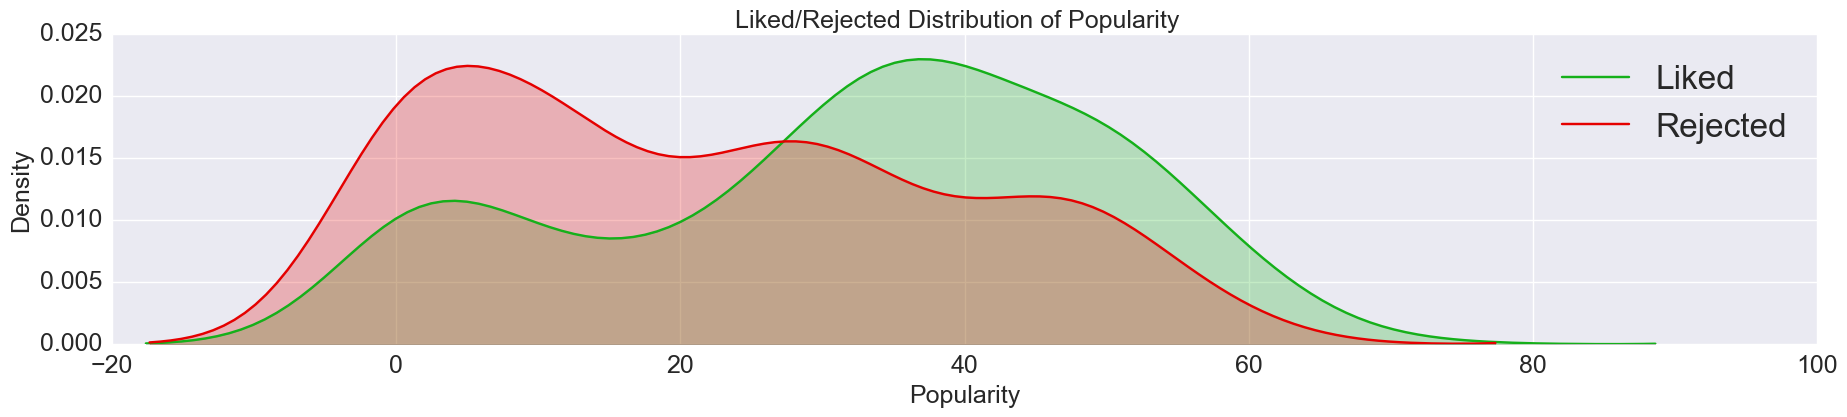

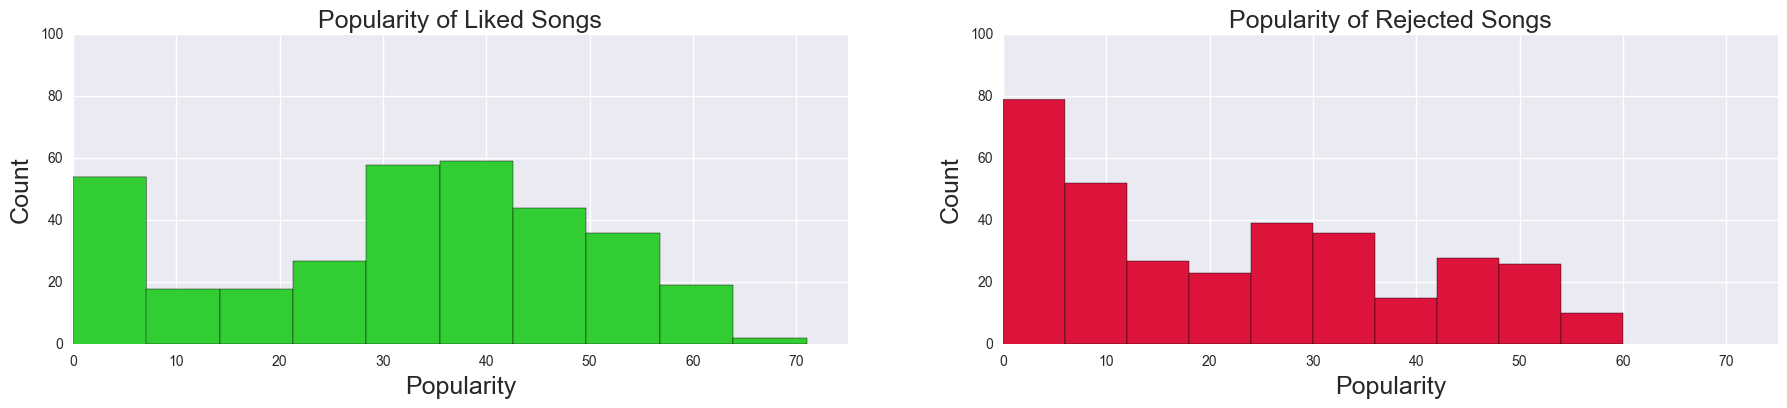

In [11]:
# Popularity Density Plot
fig, ax = plt.subplots(figsize=(22,4))
ax = sns.kdeplot(liked_mean_popularity, shade=True, color=sns.xkcd_rgb["green"], label="Liked")
ax = sns.kdeplot(rejected_mean_popularity, shade=True, color=sns.xkcd_rgb["red"], label="Rejected")
ax.set_title('Liked/Rejected Distribution of Popularity  ', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('Popularity', fontsize = 18)
plt.legend(fontsize=24)
set_tick_labels(ax)

# Popularity Histogram
fig, ax = plt.subplots(1, 2, figsize=(22,4))
ax[0].hist(liked_mean_popularity, color='limegreen')
ax[0].set_title('Popularity of Liked Songs', fontsize = 18)
ax[0].set_ylabel('Count', fontsize = 18)
ax[0].set_xlabel('Popularity', fontsize = 18)
ax[0].set_ylim((0,100))
ax[0].set_xlim((0,75))

ax[1].hist(rejected_mean_popularity, color='crimson')
ax[1].set_title('Popularity of Rejected Songs', fontsize = 18)
ax[1].set_ylabel('Count', fontsize = 18)
ax[1].set_xlabel('Popularity', fontsize = 18)
ax[1].set_ylim((0,100))
ax[1].set_xlim((0,75))

The Rejected playlist is somewhat right skewed while the Liked playlist is somewhat bimodal. Although the Rejected playlist has more "unpopular" songs, both playlists include plenty of unpopular songs. In fact, the Liked playlist actually includes 22 songs with a popularity of zero and the Rejected playlist includes 51 with a popularity of zero. Also, the Rejected playlist includes a good number of moderately popular songs, although fewer than the Liked playlist. Interesting, but popularity doesn't appear to be a differentiating predictor.

Another metadata feature of interest that was dropped is genre. It turns out that the genre is actually a constellation of several related sub-genres. Below shows 10 sample tracks and the sub-genres that Spotify has assigned to them. Often a track is assigned several sub-genres although "Chill" is the umbrella genre for all of the songs in this project.

In [12]:
master_dataframe.loc[10:20, ["Song", "Artist Genres"]]

,Song,Artist Genres
10,Takeover,"['neurostep', 'vapor twitch']"
11,Kissed By A Kisser,"['acid jazz', 'ninja', 'nu jazz', 'trip hop']"
12,Parks On Fire,['chillstep']
13,Schwindelig - Original,"['deep disco house', 'deep euro house', 'deep ..."
14,I'll Be Your Reason,"['bass trap', 'brostep', 'catstep', 'edm', 'el..."
15,Sun Models (feat. Madelyn Grant),"['chillwave', 'edm', 'electronic trap', 'indie..."
16,Unfold,"['deep tropical house', 'downtempo', 'tropical..."
17,Night - Lone Wolf Trait Remix,"['bow pop', 'compositional ambient', 'minimal'..."
18,Whyarntyou,"['bass music', 'chillstep', 'future garage', '..."
19,Feeling,['vapor twitch']


Below, I display a list of the top 30 sub-genres for the Liked and Rejected playlists.

In [13]:
import ast  # used to convert arrays as strings into literal arrays
import collections

# get the various sub-genres for the Liked and Rejected datasets
def get_genres(master_dataframe, genres_column):
        arr = master_dataframe[genres_column]      
        # the genres are in the form of lists as strings and need to be interpreted as literal arrays
        genres_list_of_lists = [ast.literal_eval(i) for i in arr.values] 
        genres_list = np.concatenate(genres_list_of_lists) # flattens list of lists       
        genres_set = set(genres_list)  # returns a set of the individual genres
        genres_count = collections.Counter(genres_list) # return Counter object with the frequency count of the genres
        return genres_count, genres_set
    
liked_df = master_dataframe[master_dataframe['Liked'] == 1]
rejected_df = master_dataframe[master_dataframe['Liked'] == 0]
liked_genres_count, liked_genres = get_genres(liked_df, 'Artist Genres')  # returns a dict genre:count, and set of genres
rejected_genres_count, rejected_genres = get_genres(rejected_df, 'Artist Genres') # returns a dict genre:count, and set of genres

liked_top30_genres = liked_genres_count.most_common(30) # returns a list of tuples (sub-genre, count)
rejected_top30_genres = rejected_genres_count.most_common(30)

genres_df = pd.DataFrame({"Liked Sub-Genres": liked_top30_genres, "Rejected Sub-Genres":rejected_top30_genres}, index=list(range(1, 31)))
print(genres_df)

                 Liked Sub-Genres            Rejected Sub-Genres
1              (vapor twitch, 89)                  (dubstep, 32)
2              (indietronica, 62)                (chillstep, 29)
3                (electronic, 55)               (microhouse, 27)
4                  (trip hop, 52)               (bass music, 26)
5                 (indie r&b, 49)           (minimal techno, 26)
6                 (chillstep, 49)               (electronic, 25)
7                 (chillwave, 46)                    (house, 24)
8            (tropical house, 44)             (indietronica, 22)
9            (deep indie r&b, 43)               (tech house, 22)
10                (downtempo, 38)               (indie jazz, 21)
11                  (nu jazz, 38)                  (substep, 19)
12                    (ninja, 34)             (fourth world, 18)
13                    (wonky, 29)                    (wonky, 18)
14                  (substep, 27)                (indie r&b, 17)
15              (escape r

According to Spotify, there are a total of 268 sub-genres between the two playlists. Apparently my favorite is something called 'vapor twitch' and it's not included in the top 30 sub-genres for the Rejected playlist. Nevertheless, focusing on the top 10 of both lists, 'indietronica' is the 2nd most popular sub-genre for the Liked playlist and the 8th most popular for the Rejected playlist, 'electronic' is 3rd on the Liked list and 6th on the Rejected list, and 'chillstep' is 6th for Liked and 2nd for Rejected. This underscores the great similarity in genre or music style between the two playlists even though one is distinctly prefered over the other. Although there is naturally great overlap in sub-genres between the two playlist there is quite a quantitative difference. Below is a barplot visualizing the top 30 sub-genres for the Liked playlist and the number of songs identified with each sub-genre. For comparison, another barplot visualizes the same sub-genres but reflects the quantity in the Rejected playlist. 

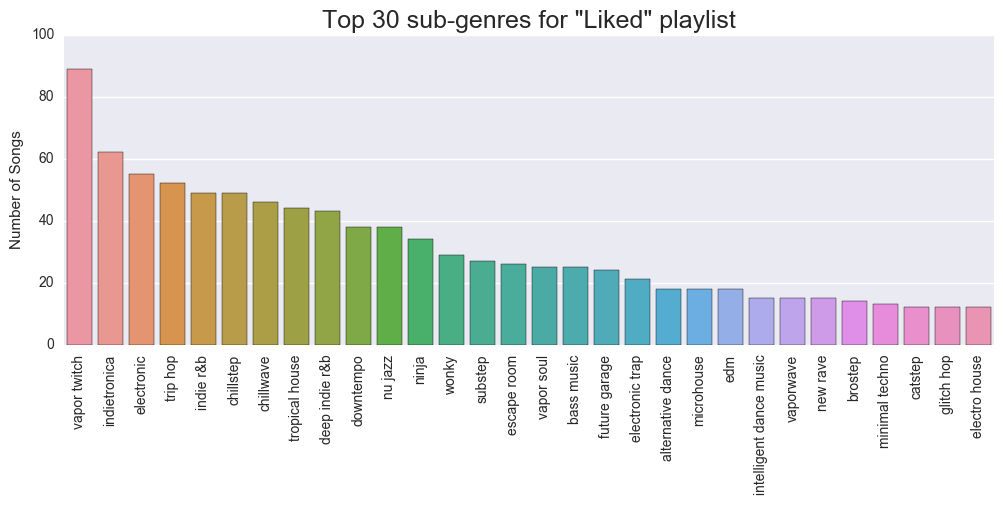

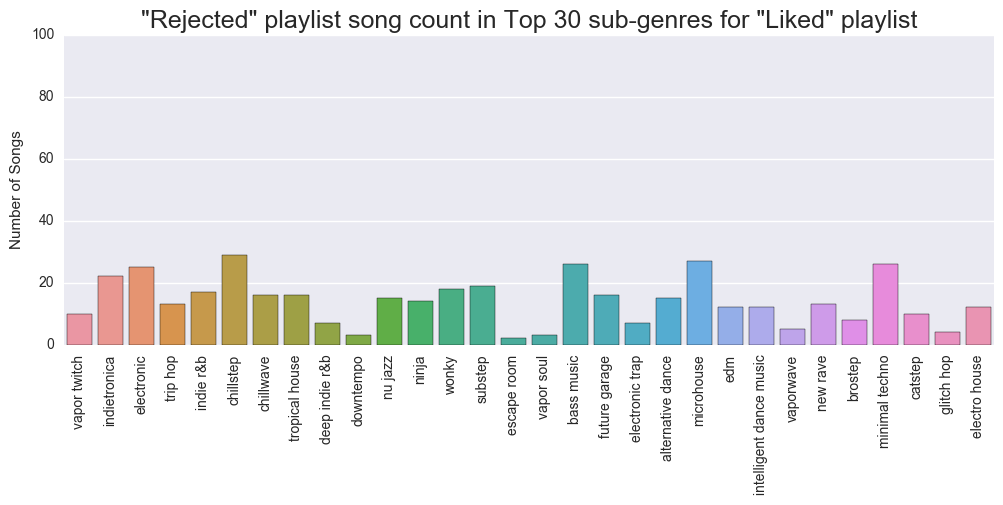

In [14]:
import seaborn as sns
sns.set(style="darkgrid")

# for charting a BARPLOT of shared category frequencies
genres_liked_categories = [i for i,j in liked_genres_count.most_common()]  # most_common returns ALL (sorted list of tuples) if no parameter
genres_liked_counts = [j for i,j in liked_genres_count.most_common()]
genres_rejected_counts = [rejected_genres_count[i] for i in genres_liked_categories]

# Top 30 sub-genre frequencies in "liked" playlist
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x=genres_liked_categories[:30], y=genres_liked_counts[:30])
plt.xticks(range(30), genres_liked_categories[:30], rotation=90)
plt.ylim(0, 100)
plt.ylabel("Number of Songs")
ax.set_title('Top 30 sub-genres for "Liked" playlist', fontsize = 18)

fig, ax2 = plt.subplots(figsize=(12,4))
sns.barplot(x=genres_liked_categories[:30], y=genres_rejected_counts[:30][:30])
plt.xticks(range(30), genres_liked_categories[:30], rotation=90)
plt.ylim(0, 100)
plt.ylabel("Number of Songs")
ax2.set_title('"Rejected" playlist song count in Top 30 sub-genres for "Liked" playlist', fontsize = 18)

In [15]:
print("Total Number of Sub-Genres: ", len(liked_genres.union(rejected_genres)))
print("Intersection: ", len(liked_genres.intersection(rejected_genres)))
print("Symmetric Difference: ", len(liked_genres.symmetric_difference(rejected_genres)))
print("Liked - Rejected Difference: ", len(liked_genres.difference(rejected_genres)))
print("Rejected - Liked Difference: ", len(rejected_genres.difference(liked_genres)))

Total Number of Sub-Genres:  268
Intersection:  123
Symmetric Difference:  145
Liked - Rejected Difference:  54
Rejected - Liked Difference:  91


### Feature Engineering to Account for Sub-Genres
Of the 268 sub-genres 123 are shared, but perhaps more importantly there are 91 sub-genres from the Rejected playlist that are completely absent from the Liked playlist. In other words, songs identified with certain sub-genres are always rejected regardless of any other sub-genres with which they are also identified. I decided to create a feature that indicates that a song is labeled with a sub-genre that is exclusively from the Rejected playlist, even if it is also labeled with other sub-genres included in the Liked playlist. There are 87 songs out of the 335 in the Rejected playlist that are distinguished in this way.

In [16]:
# add feature to identify tracks whose genres are exclusively in the rejected genres
exclusively_rejected_genres = rejected_genres.difference(liked_genres) # the difference between the REJECTED and LIKED genre sets
# genres lists are in the form of a string and need to be interpreted literally as a list
interpreted_genres_as_array = [ast.literal_eval(i) for i in master_dataframe["Artist Genres"].values]

def in_rejected_genres(genres_feature_column, genres):
    in_rejected = np.zeros(len(interpreted_genres_as_array)) # create array of zeros the length of the dataframe
    for i, arr in enumerate(genres_feature_column):
        for item in arr:
            if item in genres:
                in_rejected[i] = 1  # mark index with a 1 if it's genre is within the exclusively rejected genres
    return in_rejected
 
in_rejected_genres = in_rejected_genres(interpreted_genres_as_array, exclusively_rejected_genres)

#add the "In Rejected Genres" feature to the dataframe
df["In Rejected Genres"] = in_rejected_genres

### Ensembles
Using all of the features, including the "In Rejected Genres" engineered feature, I next want to evaluate ensembles of classifiers. I chose a Random Forest classifier as it is able to model non-linear relationships and can additionally deal with a relatively high number of predictors. I performed a nested grid search with cross-validation and achieved an encouraging mean accuracy of 77.8% (below). 

In [17]:
# different feature subsets
X_Pitch_ = df.iloc[:, 8:104].values
X_Timbre_ = df.iloc[:, 104:200].values
X_Pitch_Timbre_ = df.iloc[:, :216].values
X_Pitch_Sections_ = np.hstack((df.iloc[:, 8:104].values, df.iloc[:, 216:].values))
X_Timbre_Sections_ = np.hstack((df.iloc[:, 104:200].values, df.iloc[:, 216:].values))
X_All_ = df.values

# split dataset into test/train  using All features
X_train, X_test, y_train, y_test = train_test_split(X_All_, y, random_state=1, test_size=0.3)
# standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

rf2 = RandomForestClassifier(random_state=0, n_jobs=-1)
param_grid = [{"n_estimators": [5000, 10000], "max_features": [None, 'auto']}]
gs2 = GridSearchCV(estimator=rf2, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1)  
scores = cross_val_score(gs2, X_train_std, y_train, scoring='accuracy', cv=10)
print("Random Forest CV scores:\n {}".format(scores))
print("Random Forest mean CV accuracy: {}".format(scores.mean()))

Random Forest CV scores:
 [ 0.79166667  0.72916667  0.75        0.78723404  0.74468085  0.72340426
  0.91304348  0.76086957  0.73913043  0.84782609]
Random Forest mean CV accuracy: 0.7787022047486893


I also want to try an ensemble of a variety of different ("weak") classifier's. I used sklearn's Voting Classifier which outputs the majority class from among various individual classifiers. In effect, with a "Stacking" classifier, one classifier may compensate for particularly weak areas in a different classifier thus perhaps collectively enabling more accurate predictions. Below shows a comparison of the individual classifiers versus their ensemble (Logistic Regression, Decision Tree, K-Nearest Neighbor) using their mean 10-fold cross validation score and standard deviation (to note the variability in the models' predictions). Two different voting methods are displayed. The first employs "hard" voting which is majority rule among the three classifiers. The second uses "soft" voting which selects the classifier with the greatest sum of the predicted probabilities; it also uses the Area Under the ROC Curve scoring which can allow for a more comparable difference between each of the models than raw accuracy alone as it gives insight into the trade-off between true positive and false positive rates. The "hard" voting ensemble shows a slight improvement in accuracy among the individual classifiers with 75% accuracy.

In [18]:
from sklearn.ensemble import VotingClassifier

# split dataset into test/train  using All features
X_train, X_test, y_train, y_test = train_test_split(X_All_, y, random_state=1, test_size=0.3)
# standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# ENSEMBLE "Voting"
clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=0)
clf2 = DecisionTreeClassifier(max_depth=None,  criterion='entropy', random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')

# Ensemble Majority Class (using 'accuracy')   # 'hard' doesn't use probabilities so I can't use scoring ='roc_auc'
clf_ensemble_hard = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='hard')
print('\nEnsemble Majority Class (hard):\n')
for clf, name in [(clf1, 'Logistic Regression'), (clf2, 'Decision Tree'), (clf3, 'KNN'), (clf_ensemble_hard, 'Ensemble')]:
    scores = cross_val_score(clf, X_train_std, y_train, cv=10, scoring='accuracy')
    print("Accuracy: {:0.2f} (+/- {:0.2f}) [{}]".format(scores.mean(), scores.std(), name))
    
# Ensemble Majority Probability  (using 'roc_auc')  
clf_ensemble_soft = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('knn', clf3)], voting='soft')
print('\nEnsemble Majority Probability (soft):\n')
for clf, name in [(clf1, 'Logistic Regression'), (clf2, 'Decision Tree'), (clf3, 'KNN'), (clf_ensemble_soft, 'Ensemble')]:
    scores = cross_val_score(clf, X_train_std, y_train, cv=10, scoring='roc_auc')
    print("ROC AUC: {:0.2f} (+/- {:0.2f}) [{}]".format(scores.mean(), scores.std(), name))


Ensemble Majority Class (hard):

Accuracy: 0.73 (+/- 0.06) [Logistic Regression]
Accuracy: 0.69 (+/- 0.06) [Decision Tree]
Accuracy: 0.69 (+/- 0.07) [KNN]
Accuracy: 0.75 (+/- 0.06) [Ensemble]

Ensemble Majority Probability (soft):

ROC AUC: 0.80 (+/- 0.05) [Logistic Regression]
ROC AUC: 0.69 (+/- 0.06) [Decision Tree]
ROC AUC: 0.75 (+/- 0.09) [KNN]
ROC AUC: 0.80 (+/- 0.07) [Ensemble]


### Model Selection and Testing
After evaluating many models, the ensemble Random Forest and SVM classifers have particularly shown promise. Using the best hyperparameters identified earlier from grid search, I will retrain each classifier on the complete training set using the Pitch_Sections subset as the features. I will then evaluate generalizability using the unseen independent test set. 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_Pitch_Sections_, y, random_state=1, test_size=0.3)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# using best parameters from Grid Search
rf3 = RandomForestClassifier(n_estimators = 1000, max_features=.5, max_depth=None, random_state=0, n_jobs=-1)

rf3.fit(X_train_std, y_train)
print("Train Accuracy: {}".format(rf3.score(X_train_std, y_train)))
print("Test Accuracy: {}".format(rf3.score(X_test_std, y_test)))

Train Accuracy: 1.0
Test Accuracy: 0.7960199004975125


The Random Forest model achieves a pretty good accuracy score of 79.6% on the test set. The confusion matrix (below) shows that it also achieves a high recall on "Liked" tracks and high precision on "Rejected" tracks, perhaps key capabilities with music recommendation. In other words, while the model is able to correctly identify a large portion of the "Liked" tracks, when the model predicts that a track is likely to be rejected it is accurate nearly 90% of the time. 

Precision: 0.726, Recall: 0.891, F1: 0.800
             precision    recall  f1-score   support

   rejected       0.89      0.72      0.79       109
      liked       0.73      0.89      0.80        92

avg / total       0.81      0.80      0.80       201



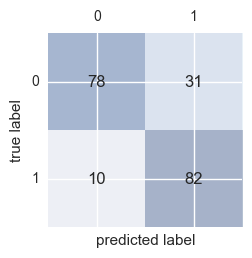

In [20]:
# Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = rf3.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["rejected", "liked"]))

One thing to note, although the Random Forest model achieves an accuracy of about 80% on the test set it achieves a perfect score on the training set. This indicates that it is substantially overfitting and some adjustments to model complexity can be made. To address this I reduced the 'max_features' parameter so that the Random Forest considers a reduced 10% of the features when looking for the best split. I also did some pre-pruning by limiting the 'max_depth' to 5. These changes in the hyperparameters resulted in an accuracy of 95% on the (biased) training set and 77% on the test set. However, this estimate of the generalization performance may be pessimistically biased if the model has not had the opportunity to reach its capacity, assuming that the algorithm could learn a better model from more data. With this in mind, I plotted a learning curve (below). The plot suggests that more data would attenuate overfitting and provide a potential increase in accuracy. In other words, the algorithm may have the capability to learn a more powerful, generalizable model if it is provided exposure to more data.

In [21]:
rf3 = RandomForestClassifier(n_estimators = 1000, max_features=.1, max_depth=5, random_state=0, n_jobs=-1)
rf3.fit(X_train_std, y_train)
print("Train Accuracy: {}".format(rf3.score(X_train_std, y_train)))
print("Test Accuracy: {}".format(rf3.score(X_test_std, y_test)))

Train Accuracy: 0.9339019189765458
Test Accuracy: 0.7860696517412935


[ 1.          0.99047619  0.96865079  0.95357143  0.94228029]
[ 0.67386872  0.72934397  0.74636718  0.76334991  0.76121839]


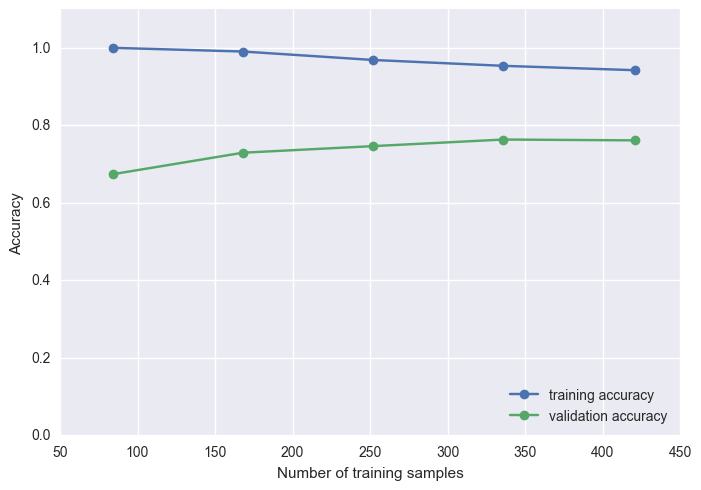

In [22]:
# LEARNING CURVE
from sklearn.model_selection import validation_curve, learning_curve

train_sizes, training_scores, validation_scores = learning_curve(rf3, X_train_std, y_train, train_sizes=[.2, .4, .6, .8, 1], cv=10)

t_mean = np.mean(training_scores, axis=1)
v_mean = np.mean(validation_scores, axis=1)

print(t_mean)
print(v_mean)

fig, ax = plt.subplots()

ax.plot(train_sizes, t_mean, marker = 'o', label='training accuracy')
ax.plot(train_sizes, v_mean, marker = 'o', label='validation accuracy')
ax.set_xlabel('Number of training samples')
ax.set_ylabel('Accuracy')
ax.set_ylim([0.0,1.1])
ax.legend(loc='lower right')

Next, I similarly trained the Support Vector Machine on the complete training set and then evaluated its performance on the independent test set. Its predictive performance on the test set was 76% and it's confusion matrix showed that recall and precision were both highest for the "Rejected" class (although these metrics can be tuned to some degree as appropriate by manipulating the threshold, the distance to the decision boundary for classification).

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_All_, y, random_state=1, test_size=0.3)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# using best parameters from Grid Search
svm2 =  SVC(C=10, gamma=.01, kernel='rbf', probability=True, random_state=0)

svm2.fit(X_train_std, y_train)
print("Train Accuracy: {}".format(svm2.score(X_train_std, y_train)))
print("Test Accuracy: {}".format(svm2.score(X_test_std, y_test)))

Train Accuracy: 1.0
Test Accuracy: 0.7611940298507462


Precision: 0.744, Recall: 0.728, F1: 0.736
             precision    recall  f1-score   support

   rejected       0.77      0.79      0.78       109
      liked       0.74      0.73      0.74        92

avg / total       0.76      0.76      0.76       201



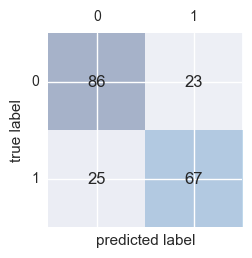

In [24]:
# SVM Confusion Matrix
y_pred = svm2.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["rejected", "liked"]))

This SVM model also appears to be overfitting as again the accuracy on the training set is 100%. Here, I reduced the regularization parameter (increased regularization) and gamma to reduce complexity. The modification produced a 92.5% accuracy on the training set and 78.6% on the test set, which is an improvement. Further, the associated learning curve (below) shows an improving generalization accuracy (validation set) with an increasing training set size. When the training set is small noise has a greater influence on the learned model so that it doesn't generalize as well to unseen data. The learning curve, as before, suggests that providing more training data may help to decrease overfitting and improve predictive accuracy.

In [25]:
svm3 =  SVC(C=5, gamma=.001, kernel='rbf', probability=True, random_state=0)
svm3.fit(X_train_std, y_train)
print("Train Accuracy: {}".format(svm3.score(X_train_std, y_train)))
print("Test Accuracy: {}".format(svm3.score(X_test_std, y_test)))

Train Accuracy: 0.9253731343283582
Test Accuracy: 0.7860696517412935


[ 0.96428571  0.95654762  0.93134921  0.9389881   0.92779097]
[ 0.68646122  0.72476681  0.74161656  0.76751657  0.78236586]


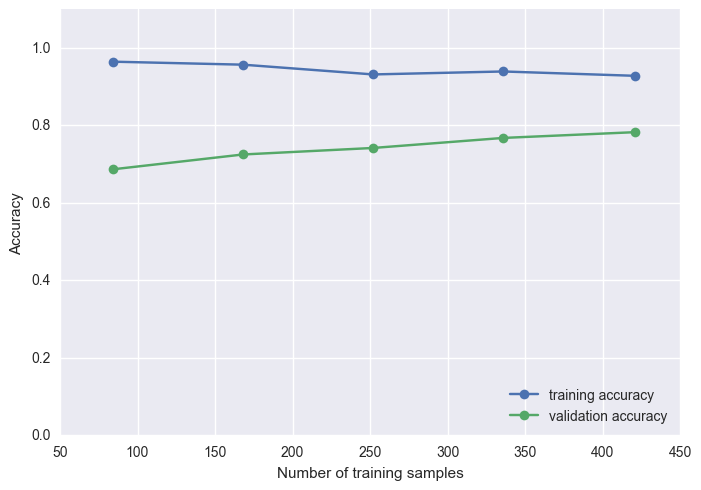

In [26]:
# LEARNING CURVE
from sklearn.model_selection import validation_curve, learning_curve

train_sizes, training_scores, validation_scores = learning_curve(svm3, X_train_std, y_train, train_sizes=[.2, .4, .6, .8, 1], cv=10)

t_mean = np.mean(training_scores, axis=1)
v_mean = np.mean(validation_scores, axis=1)

print(t_mean)
print(v_mean)

fig, ax = plt.subplots()

ax.plot(train_sizes, t_mean, marker = 'o', label='training accuracy')
ax.plot(train_sizes, v_mean, marker = 'o', label='validation accuracy')
ax.set_xlabel('Number of training samples')
ax.set_ylabel('Accuracy')
ax.set_ylim([0.0,1.1])
ax.legend(loc='lower right')

## Discussion

Although the SVM and Random Forest both show relatively strong predictive performance, the Random Forest classifier has stronger precision and recall metrics and perhaps would be the better choice for this dataset. Particularly, for music recommendations, a strong "rejection" precision score would be important. Depending on the use case, effectively identifying "bad" recommendations for a specific user from among a pool of generated recommendations originating from their taste profile would be useful.

Previous studies have similarly reported that SVMs are very effective for music classification (Hartmann et al. 2013, Schindler & Rauber, 2012). These same studies also reported that Timbre (MFCC) attributes in the context of genre classification show superior performance compared to using Pitch (Chroma) features. However, in this project, Pitch outperformed Timbre in identifying favored songs within the same genre. Perhaps it is that Timbre descriptors play a greater role in discriminating between varied musical styles and instruments whereas Pitch perhaps takes on greater importance when differentiating  within similar musical styles. Moreover, the addition of Tempo features from song Sections may particularly play a strong role in helping to identify patterns for classification within a narrowed genre. Although, it may depend on the genre, as "Chill" is very beat-centric which may enhance the significance of Tempo discriptors in classifiying within this genre. 

The principal decision to focus on a single genre must also be kept in mind. Muller et al. (2011) have suggested that music analysis tasks can be improved by restricting the domain and training models separately for a single genre of music so that the parameters and models are specifically tailored to a particular signal. A mixed-genre task would have different concerns, maybe favor different acoustic features, and perhaps yield reduced accuracy.

Finally,, the virtual absence of vocals, specifcally lyrics, within these tracks also may be an important assumption. Gjerdingen and Perrott (2008) found that the presence of vocals in extracts reduced genre classification performance. Thus, the presence of vocals may greatly alter the balance of importance among the various extracted features and may increase the difficulty of the classification task. 


    
## Conclusion

The goal of this project was to determine if a machine learning model could be trained to learn the musical tastes of a specific user beyond their Spotify taste profile. In other words, given Spotify recommendations, if a user segregates "liked" and "rejected" tracks into separate playlists can a model learn patterns to discriminate between the two when presented with new tracks? This project provides strong evidence suggesting that using the temporal acoustic features from each track a model can learn the presence of musical attributes that distinguishes the user's preference in music.

## References

Bertin-Mahieux, T. (2013). Large-Scale Pattern Discovery in Music. Doctoral Thesis.
 
Dieleman, S. & Schrauwen, B. (2011). Audio-based music classification with a pretrained convolutional network. In Proceedings of the 12th International Conference on Music Information Retrieval (ISMIR 2011).

Gjerdingen, R. and Perrott, D. (2008). Scanning the Dial: The Rapid Recognition of Music Genres, Journal of New Music Research, 37: 2, 93 — 100.

Hartmann, M., Saari, P., Toiviainen, P. & Lartillot, O. (2013). Comparing Timbre-based Features for Musical Genre Classification. Proceedings of the Sound and Music Computing Conference, SMC 2013, Stockholm, Sweden.

Müller, M., Member, Ellis, D., Klapuri, A., Richard, G. (2011). Signal Processing for Music Analysis. IEEE Journal of Selected Topics in Signal Processing, Vol. 0, No. 0.

Prockup, M., Ehmann, A., Gouyon, F., Schmidt, E., Celma, O. & Kim, Y. (2015). Modeling genre with the music genome project: Comparing human-labeled attributes and audio features. Proc. of the International Society for Music Information Retrieval Conference.

Schindler, A., & Rauber, A. (2012). Capturing the temporal domain in echonest features for improved classification effectiveness. In Proc. Adaptive Multimedia Retrieval. 